# 4. Teste do modelo

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py
import keras
import k3d
from sklearn.metrics import confusion_matrix, f1_score
from ipywidgets import interact, widgets

import src

Using TensorFlow backend.


In [2]:
classnames = {
    0: 'Floodplain',
    1: 'Pointbar',
    2: 'Channel',
    3: 'Boundary',
}

model = keras.models.load_model('../models/trained_model.h5')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_______________________________________

In [3]:
with h5py.File('../data/processed/stanford6_truncated_rgb.h5', 'r') as dataset:
    x_test = np.array(dataset['test/X'])
    y_test = np.array(dataset['test/Y'])
    
with h5py.File('../data/interim/stanford6_truncated_rgb.h5', 'r') as dataset:
    true_labels = np.array(dataset['test/Y'])    

1769768/1769768 [==============================] - 86s 49us/step
Test loss: 0.9372875094345259
Test acc: 0.7764345383123664
F1-score: 0.7692933954113622


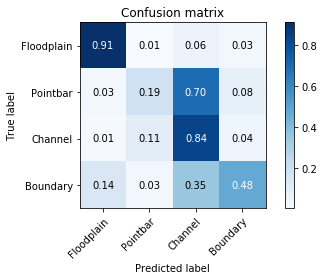

In [4]:
scores = model.evaluate(x_test, y_test, verbose=1)
for i, score in enumerate(scores):
    print(f'Test {model.metrics_names[i]}: {score}')
      
predict_class = np.argmax(model.predict(x_test), axis=1)
print(f'F1-score: {f1_score(true_labels, predict_class, average="weighted")}')
matrix = confusion_matrix(true_labels, predict_class)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
      
src.plot_confusion_matrix(matrix, classnames.values(), title="Confusion matrix")

In [5]:
def plot_section(z=0):
    plt.subplot(121)
    plt.imshow(true_labels.reshape(119, 169, 88)[:,:,z].T)
    plt.subplot(122)
    plt.imshow(predict_class.reshape(119, 169, 88)[:,:,z].T)
    
interact(plot_section, z=widgets.IntSlider(min=0,max=87,step=1,value=0))

interactive(children=(IntSlider(value=0, description='z', max=87), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_section(z=0)>

In [8]:
color_map = (0x3A528B, 0x20908C, 0xFDE724)

plot = k3d.plot(camera_auto_fit=False)
obj = k3d.voxels(predict_class.reshape(119, 169, 88).T, color_map, compression_level=1)
plot += obj
plot.camera=[150, 230, -40, 60, 85, 80, 0.0, 0.0, -1.0]
plot.display()

Output()

In [7]:
color_map = (0x3A528B, 0x20908C, 0xFDE724)

plot = k3d.plot(camera_auto_fit=False)
obj = k3d.voxels(true_labels.reshape(119, 169, 88).T, color_map, compression_level=1)
plot += obj
plot.camera=[150, 230, -40, 60, 85, 80, 0.0, 0.0, -1.0]
plot.display()

c:\users\arthur\anaconda3\envs\tcc\lib\site-packages\traittypes\traittypes.py:101: UserWarning: Given trait value dtype "int8" does not match required type "uint8". A coerced copy has been created.
  np.dtype(self.dtype).name))


Output()